In [2]:
# Music data set 3 without emotions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv", sep = ",")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
pd.set_option('display.max_rows', None)
genre_counts = df['track_genre'].value_counts()
genre_counts

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000
study       

In [5]:
df.size

2394000

In [6]:
# Main emotions 
# 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise'

# Used Genres
# 1. alternative & indie, 2. blues, 3. classical, 4. country, 5. 
# electronica & dance, 6. folk, 7. gospel, 8. hip-hop & rap, 9. 
# jazz, 10. Latin, 11. metal, 12. new age, 13. pop, 14. reggae, 15. 
# rock, 16. soul, rnb & funk, and 17. world music

# Given list of genres
given_genres = ['alternative', 'indie', 'blues', 'classical', 'country', 'electronic', 'electro', 'dance', 'folk', 'gospel', 'hip-hop',
               'rap', 'jazz', 'latin', 'metal', 'new-age', 'pop', 'reggae', 'rock', 'soul', 'r-n-b', 'funk', 'world-music']

# Extract unique genres from the DataFrame
dataset_genres = df['track_genre'].unique()

# Find genres among the given list that are present in the dataset
common_genres = set(given_genres).intersection(set(dataset_genres))

print("Genres present in the moview:", len(given_genres))
print("Genres present in the dataset:", len(dataset_genres))
print("Genres from the given list that are present in the dataset:", len(common_genres))

Genres present in the moview: 23
Genres present in the dataset: 114
Genres from the given list that are present in the dataset: 22


In [7]:
# Find genres from the given list that are not present in the dataset
genres_not_in_dataset = set(given_genres) - set(dataset_genres)


print("Genres from the given list that are not present in the dataset:", genres_not_in_dataset)

Genres from the given list that are not present in the dataset: {'rap'}


In [8]:
# According to the papar 
# Happy = 3, 6 -> pop 'electronic', 'electro', 'dance' 'world-music' 'soul', 'r-n-b', 'funk' latin reggae
# Sad = 1 -> blues
# Anger = 2 -> metal
# Frustration = 5 = 'Disgust', 'Fear' -> metal
# neutral = 4 + sleepy = 7 -> folk 'world-music'

# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Angry': ['metal', 'rock'],
    'Frustration': ['metal', 'rock'],
    'Happy': ['pop', 'electronic', 'electro', 'dance', 'world-music', 'soul'],
    'Sad': ['blues', 'alternative', 'indie'],
    'Neutral': ['folk', 'world-music']
}

# Function to map emotions based on genres
def map_emotions(genres):
    emotions = []
    for emotion, genre_list in emotion_genre_mapping.items():
        if any(genre in genres for genre in genre_list):
            emotions.append(emotion)
    return emotions if emotions else ['Unknown']  # Assign 'Unknown' if no emotion is found

# Create a new column 'emotions' and map it based on genres
df['emotions'] = df['track_genre'].apply(map_emotions)

# Display the resulting DataFrame
df.head()




,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotions
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,[Unknown]
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,[Unknown]
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,[Unknown]
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,[Unknown]
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,[Unknown]


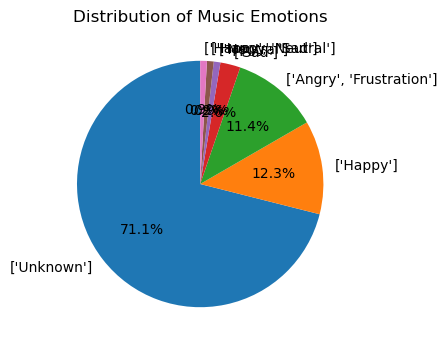

In [10]:
# Count the occurrences of each label
label_counts = df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

In [12]:
label_counts = df['emotions'].value_counts()
print(label_counts)

[Unknown]               81000
[Happy]                 14000
[Angry, Frustration]    13000
[Sad]                    3000
[Neutral]                1000
[Happy, Sad]             1000
[Happy, Neutral]         1000
Name: emotions, dtype: int64


In [13]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotions
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music,"[Happy, Neutral]"
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music,"[Happy, Neutral]"
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music,"[Happy, Neutral]"
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music,"[Happy, Neutral]"
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music,"[Happy, Neutral]"
